In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
def preprocess_null(df, col):
    df[col] = df[col].astype(str)
    remove_rows = df[col].str.contains('NULL', regex=False)
    df.loc[df[col] == remove_rows] = np.nan
    df[col].where(~remove_rows, inplace=True)
    return df

def create_data_pairs(df, lang1, lang2, save_name, folder='data/all_data/'):
    l1 = df[df[lang1].notnull() & df[lang2].notnull()][lang1]
    l2 = df[df[lang1].notnull() & df[lang2].notnull()][lang2]
    l1.to_csv(f'{folder}/{lang1}_{lang2}_{save_name}.{lang1}', index=False)
    l2.to_csv(f'{folder}/{lang1}_{lang2}_{save_name}.{lang2}', index=False)
    return l1, l2

def create_data_sets(lang1, lang2):
    sets = ['train', 'test', 'dev']

    for data_set in sets:
        df = pd.read_csv(f'ted_talks/all_talks_{data_set}.tsv',sep='\t')

        df = preprocess_null(df, lang1)
        df = preprocess_null(df, lang2)
        if data_set == 'dev':
            data_set = 'val'
        l1, l2 = create_data_pairs(df, lang1, lang2, data_set)

def create_data_sets_same_size(target_lang, langs, folder='data/same_size/'):
    sets = ['train', 'test', 'dev']
    columns = [l for l in langs]
    columns.append(target_lang)
    for data_set in sets:
        df = pd.read_csv(f'ted_talks/all_talks_{data_set}.tsv',sep='\t')
        df = preprocess_null(df, target_lang)
        for lang in langs:

            df = preprocess_null(df, lang)
        if data_set == 'dev':
            data_set = 'val'

        df = df[columns]
        df.dropna(inplace=True)
        
        for col in columns:
            df[col].to_csv(f'{folder}/{data_set}.{col}', index=False)

# lang1 = 'en'
# lang2 = 'el'
langs = ['el', 'ka', 'th']
target_lang = 'en'
create_data_sets_same_size(target_lang, langs)

In [22]:
df = pd.read_csv(f'ted_talks/all_talks_train.tsv',sep='\t')
for col in df.columns[1:]:
    df = preprocess_null(df, col)



# # Count non null values per language and sort the resulting series. Drop 'talk_name' column
# sorted_not_null_count = df.notnull().sum().sort_values(ascending=False)
# sorted_not_null_count.drop(['talk_name'], inplace=True)

# # Plot the non null values per language
# fig, ax = plt.subplots(1, figsize=(18,12))

# ax = sns.barplot(x = sorted_not_null_count.index, y= sorted_not_null_count)
# plt.xticks(rotation=45)
# plt.show()

In [34]:
print((~df['el'].isna()).sum())
print((~df['th'].isna()).sum())
print((~df['ka'].isna()).sum())

134327
98064
13193


In [9]:
# Create a matrix of co-occuring sentences -> number of overlapping sentences per language pair
# This takes a while

# Col names are all columns except the talk names (index) column
col_names = list(df.columns)
col_names.pop(0)

# Placeholder numpy array
maatje = np.zeros((len(col_names), len(col_names)))

# For each column, compare the amount of overlapping non null entries with each other column
for idx1, col1 in enumerate(col_names):
    baseline = df[col1].notnull()
    for idx2, col2 in enumerate(col_names):
        compare = df[col2].notnull()
        diff = baseline[baseline == True] & compare[compare==True]
        overlap = diff.sum()
        maatje[idx1, idx2] = overlap

# Create dataframe from placeholder numpy array
matrix_df = pd.DataFrame(data=maatje, columns=col_names, index=col_names)
matrix_df

,en,es,pt-br,fr,ru,he,ar,ko,zh-cn,it,...,ur,eo,ms,az,ta,bn,kk,be,eu,bs
en,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0
es,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0
pt-br,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0
fr,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0
ru,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0
he,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0
ar,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0
ko,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0
zh-cn,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0
it,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,0.0


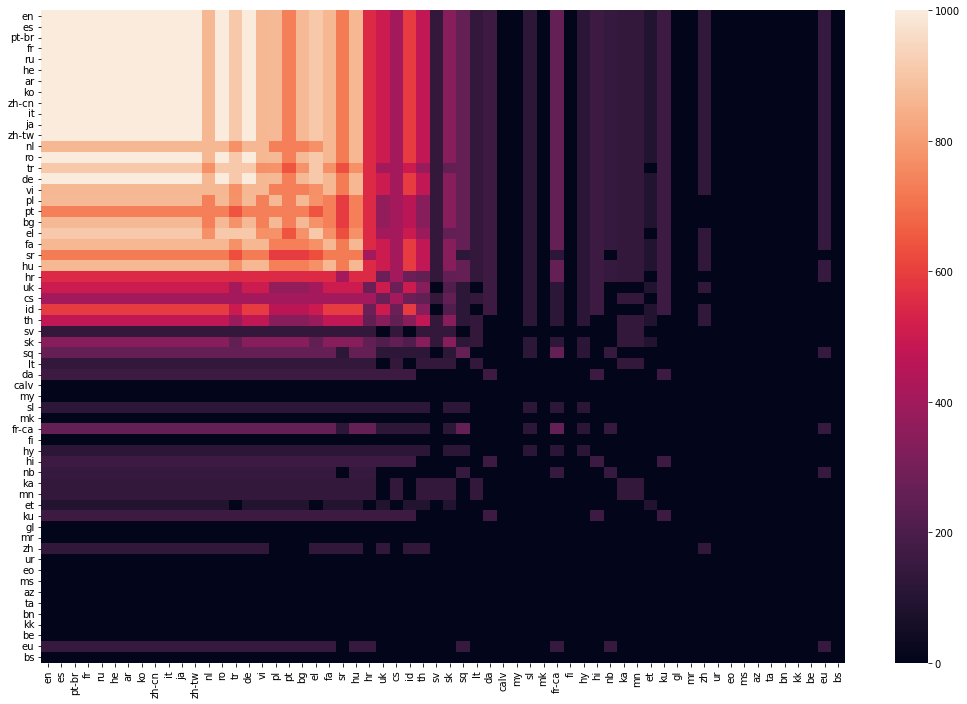

In [10]:
# Heatmap of overlapping language pairs
fig, ax = plt.subplots(1, figsize=(18,12))

ax = sns.heatmap(matrix_df)

In [ ]:
# 
bins = 3
en_col_sort = matrix_df['en'].sort_values(ascending=True)

